<a href="https://colab.research.google.com/github/Je-Hyeon/Je-Hyeon/blob/main/DataAnalysis%EC%B1%85_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# 7장: Data Cleaning and Preparation

## dropna()




In [ ]:
data = pd.DataFrame([[1.,6.5,3.],[1., np.nan, np.nan],
                    [np.nan,np.nan, np.nan],[np.nan, 6.5,3.]])
print(data)

cleaned = data.dropna()
cleaned 
# dropna는 row를 기준으로 NaN이 하나라도 있는 열을 모두 드랍한다

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


,0,1,2
0,1.0,6.5,3.0


In [ ]:
# 인수 how='all'을 주면, row의 모든 성분이 NaN인 row를 drop한다
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# dropna에 axis를 주어줄 수 있음
data[4] = np.nan
print(data)

data.dropna(axis=1, how='all')

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# dropna에 thresh 인수를 주어주기
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan

df

,0,1,2
0,-0.926593,NaN,NaN
1,-0.727382,NaN,NaN
2,0.199551,NaN,-0.147479
3,-1.458912,NaN,-1.399839
4,-1.145097,-0.797122,0.849768
5,0.018182,-1.215962,-0.355062
6,-0.606041,-1.500399,0.844517


In [ ]:
# thresh(문지방)을 주어주면 숫자 이상 NaN이 존재해야 drop한다
df.dropna(thresh=2)

,0,1,2
2,0.199551,NaN,-0.147479
3,-1.458912,NaN,-1.399839
4,-1.145097,-0.797122,0.849768
5,0.018182,-1.215962,-0.355062
6,-0.606041,-1.500399,0.844517


## fillna()

In [ ]:
df

,0,1,2
0,-0.926593,NaN,NaN
1,-0.727382,NaN,NaN
2,0.199551,NaN,-0.147479
3,-1.458912,NaN,-1.399839
4,-1.145097,-0.797122,0.849768
5,0.018182,-1.215962,-0.355062
6,-0.606041,-1.500399,0.844517


In [ ]:
# fillna에 딕셔너리 인수를 주어주면, 각 column에 원하는 값을 주어줄 수 있다.
# 딕셔너리 앞의 수는 해당하는 "Column"을 가르킨다!!
df.fillna({1:10, 2:20})

,0,1,2
0,-0.926593,10.000000,20.000000
1,-0.727382,10.000000,20.000000
2,0.199551,10.000000,-0.147479
3,-1.458912,10.000000,-1.399839
4,-1.145097,-0.797122,0.849768
5,0.018182,-1.215962,-0.355062
6,-0.606041,-1.500399,0.844517


## Duplicate 처리

* duplicated(), drop_duplicates()

In [ ]:
data = pd.DataFrame({'k1':['one','two']*3 + ['two'],
                     'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
# 겹치는게 있는지 duplicated로 확인해보기   -> 쓰임새는 별로 없을 듯

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
# 중요한건 drop_duplicates() 를 사용하는 것 

data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
# 특정한 Column만 겹치는 지 고려할 수 있다

data.drop_duplicates(['k1'])

,k1,k2
0,one,1
1,two,1


In [ ]:
# 기본으로 뒤에 등장하는 데이터를 버리는데, 앞에 오는 데이터를 버릴 수도 있다.
# keep last -> 마지막에 오는 걸 keep 해!
data.drop_duplicates(keep='last')

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
6,two,4


## map함수 사용

map에서 가장 중요한 것은 '딕셔너리'나 '함수' 인수를 받는다는 것이다

* replace와 비슷한 느낌이 있긴한데 용도는 다름, replace는 워낙 잘 아는 거라 설명을 하진 않음

In [ ]:
data = pd.DataFrame({'food':['bacon','pulled pork', 'bacon','Pastrami','corned beef','Bacon','pastrami','honey ham','nova lox'],
                     'ounces': [4,3,12,6,7.5,8,3,5,6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
# 각 고기가 어느 가축에서 나왔는지 매칭해보자 -> map 함수를 사용하면 된다.

meat_map = {'bacon':'pig', 'pulled pork':'pig', 'pastrami':'cow','honey ham':'pig','nova lox':'salmon' , 'corned beef' : 'cow'}

# 약간의 문제 : 원본 데이터에는 대문자와 소문자 둘다 있음

data['animal'] = data['food'].str.lower().map(meat_map)

data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
# axis에 map 함수 사용 

data = pd.DataFrame(np.arange(12).reshape((3,4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns= ['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:
# 여기서는 딕셔너리가 아닌 함수 인수를 받았음
data.index.map(lambda x: x[:3].upper())

Index(['OHI', 'COL', 'NEW'], dtype='object')

In [ ]:
# columns를 map을 이용해서 한번 바뀌봤음

data.columns = data.columns.map(lambda x: x.upper())
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


## cut() 함수

* cut으로 구간을 나누면 데이터는 카테고리컬 데이터가 된다

* quantile로 자르는 qcut도 있음 -> qcut은 각 구간별로 데이터 개수가 같다는 특징이 있음


In [ ]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]

# cut(자를 대상, 나눌 거)
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [ ]:
# cut할때 label을 바로 주어줄 수 있다.
label = ['Youth' , 'YoungAdult', 'MiddleAged' , 'Senior']

cats = pd.cut(ages, bins, labels = label)

cats.value_counts()

Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64

In [ ]:
# cut할 bins를 정수값으로 주어줄 수 있다. -> bins의 개수를 의미

data = np.random.randn(20) 

cat3 = pd.cut(data, 4)
cat3.value_counts()

(-2.306, -1.026]    4
(-1.026, 0.248]     9
(0.248, 1.522]      5
(1.522, 2.796]      2
dtype: int64

In [ ]:
data = np.random.randn(1000)

qcat = pd.qcut(data, 5)
qcat.value_counts()

(-2.999, -0.854]    200
(-0.854, -0.228]    200
(-0.228, 0.299]     200
(0.299, 0.797]      200
(0.797, 2.769]      200
dtype: int64

## Permutation()

* x : int or array_like
    If `x` is an integer, randomly permute ``np.arange(x)``.
    If `x` is an array, make a copy and shuffle the elements
    randomly.

* Permutation으로 랜덤한 수열을 만들어 놓고, take 함수를 사용해서 랜덤 추출을 할 수 있다

In [ ]:
# permutation을 알아보자 

print(np.random.permutation(5))

print(np.random.permutation([1,2,3,4,5,6,7,8,9]))

[2 0 4 3 1]
[6 5 2 9 3 4 8 7 1]


In [ ]:
df = pd.DataFrame(np.arange(20).reshape((5,4)))

df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
# permutation으로 만들어 놓고, take을 이용해서 그것으로 랜덤한 df를 추출할 수 있다.

a = np.random.permutation(5)
df.take(a)

,0,1,2,3
4,16,17,18,19
3,12,13,14,15
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11


## sample() 함수

In [ ]:
# 데이터프레임에서 sample 함수를 사용해서 랜덤 추출을 할 수 있다 

df.sample(n=3)

,0,1,2,3
1,4,5,6,7
2,8,9,10,11
4,16,17,18,19


In [ ]:
# replace = True를 주면 복원 추출을 할 수 있다.

df.sample(n=5 , replace= True)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
2,8,9,10,11


## 더미변수 사용

* pd.get_dummies()

* drop_first = True를 주면 통계를 위한 더미변수 출력(n-1개의 더미변수)

In [ ]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                   'data':range(6)})

pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
# cut으로 자른 데이터는 카테고리 데이터가 된다. 그것을 더미변수로 만들어 보자
values = np.random.rand(10)

bins = [0,0.2,0.4,0.6,0.8,1]

pd.get_dummies(pd.cut(values ,bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
5,1,0,0,0,0
6,0,0,0,1,0
7,1,0,0,0,0
8,0,0,1,0,0
9,0,0,1,0,0


## 문자열 처리(str)

* str로 접근

* str.contains()

In [ ]:
data = pd.Series({'Dave':'dave@naver.com', 'Steve':'steve@gmail.com','Rob':'rob@gmail.com' , 'Wes':np.nan})

data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [ ]:
# 판다스 내부 문자열에 접근할 때는 항상 str을 붙여준다
data.str[:4]

Dave     dave
Steve    stev
Rob      rob@
Wes       NaN
dtype: object

In [ ]:
# contains()로 특정 문자열을 가지고 있는 지 질의할 수 있다.

data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

# 8장: Data Wrangling

## multiindex 다루기

* inner level slicing

* slicing

### multiindex 슬라이싱

In [ ]:
# 멀티인덱스 만들어 보기  -> list of list로 인덱스를 만들어 주면 된다

data = pd.Series(np.random.randn(9),
          index=[['a','a','a','b','b','c','c','d','d'], [1,2,3,1,3,1,2,2,3]])
data

a  1   -1.670702
   2    1.034795
   3   -0.289567
b  1   -0.124645
   3   -0.942596
c  1    0.471596
   2   -0.499786
d  2   -1.005295
   3   -0.324468
dtype: float64

In [ ]:
# inner level 슬라이싱 -> loc로 접근해야 한다.
data.loc[:,2]

a    1.034795
c   -0.499786
d   -1.005295
dtype: float64

In [ ]:
# 지정해서 여러개 열을 뽑으려면 list of list로 구성해야 한다
data[['a','c']]

a  1   -1.670702
   2    1.034795
   3   -0.289567
c  1    0.471596
   2   -0.499786
dtype: float64

### 인덱스의 이름

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape(4,3), 
                     index=[['a','a','b','b'], [1,2]*2],
                     columns= [['Ohio', 'Ohio' ,'Colorado'], ['Green' , 'Red' , 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
# 인덱스 자체에 이름 주어주기

frame.index.names = ['key1', 'key2']
frame.columns.names = ['state','color']

frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

### swaplevel, sort_index

* swaplevel을 해주고, sort_level 해주는 게 국룰이래

* 인덱스 자체의 이름을 주어주던가, level을 기준으로 접근 할 수도 있다.

In [ ]:
# 인덱스 자체의 이름을 주어주고 할 수 있다.

frame.swaplevel('key1' ,'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
# 이번엔 level을 기준으로 했다.

frame.swaplevel(1,0, axis=1)

color     Green  Red    Green
state      Ohio Ohio Colorado
key1 key2                    
a    1        0    1        2
     2        3    4        5
b    1        6    7        8
     2        9   10       11

In [ ]:
frame.swaplevel(1,0).sort_index()

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## merge

* pd.merge(df1, df2) 
* merge 하는 기준(column)의 이름이 양 df에 동일하면 on= 로 주어주면 된다. on은 꼭 사용하지 않아도 알아서 merge한다.

* merge의 기준이 되는 양쪽의 columns의 이름이 다른 경우, left_on, right_on 을 사용한다

* 인덱스가 merge의 기준인 경우 left_index=True or right_index = True를 사용한다

* 즉, 한쪽은 left_index=True, 다른쪽은 right_on 이 될 수도 있다

# 9장: 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## subplots

* subplots를 만들때, 그 안에 figsize 인수를 주어줄 수 있다는 사실
* subplots_adjust를 사용해서 plot들의 간격을 조절할 수 있다는 사실

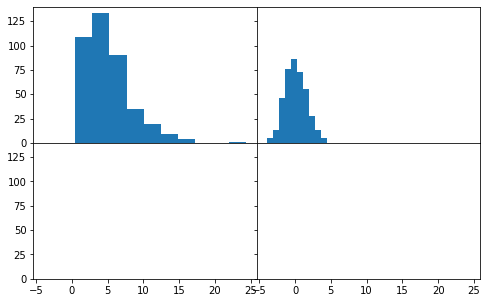

In [ ]:
# subplots 사용......    -> 바로 figsize 인수를 주어줄 수 있음

fig, ax = plt.subplots(2,2,figsize=(8,5), sharex=True, sharey=True)

a = np.arange(-2,2,0.01)

ax[0,0].hist(np.random.chisquare(5, size=len(a)))
ax[0,1].hist(np.random.normal(a))

# subplots_adjust로 각 plot들의 간격을 조절할 수 있음!!
plt.subplots_adjust(wspace=0, hspace=0)

## matplotlib plot 연습



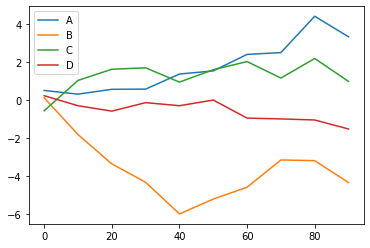

In [ ]:
# df를 한번에 plot해줌 (Columns 단위로)

df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot();

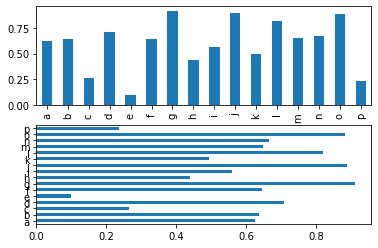

In [ ]:
# bar와 barh 사용해보기

fig, ax = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=ax[0])

data.plot.barh(ax=ax[1])

In [ ]:
df2 = pd.DataFrame(np.random.rand(6,4), index=['one','two','three','four','five','six'], columns = pd.Index(['A','B','C','D'],name='Genus'))
df2

Genus,A,B,C,D
one,0.129085,0.709386,0.546657,0.285154
two,0.877146,0.178961,0.838785,0.655974
three,0.094767,0.198189,0.873909,0.096480
four,0.442767,0.640696,0.902722,0.298804
five,0.799198,0.874438,0.555223,0.701231
six,0.873649,0.857154,0.684633,0.871141


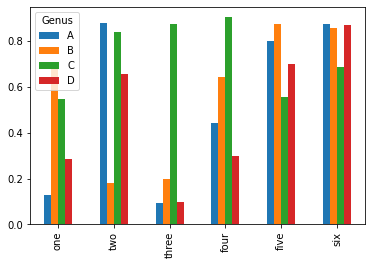

In [ ]:
# 여기서도 여러가지 df를 한번에 plot하는 걸 사용했다.

df2.plot.bar()

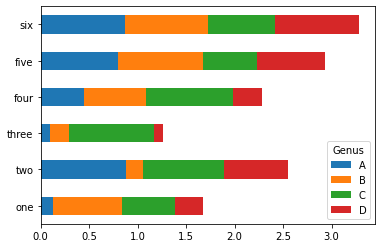

In [ ]:
# stacked 를 사용할 수 있다
df2.plot.barh(stacked=True)

## Seaborn plot 연습

In [ ]:
# 우선 tips 데이터셋을 불러오자

sns.get_dataset_names()

tip_data = sns.load_dataset('tips')

tip_data['tip_pct'] = round(tip_data['tip'] / tip_data['total_bill'], 3)
tip_data.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161


Text(0.5, 1.0, 'liner relation of total_bill and tip')

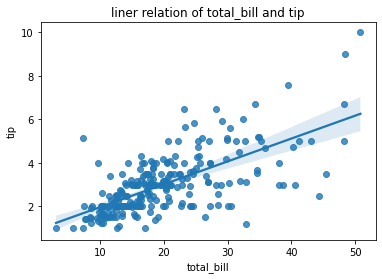

In [ ]:
# regplot: 선형 회귀선에 추정 영역까지 한번에 출력한다는 장점이 있다.

sns.regplot(x='total_bill', y='tip', data=tip_data)
plt.title('liner relation of total_bill and tip')

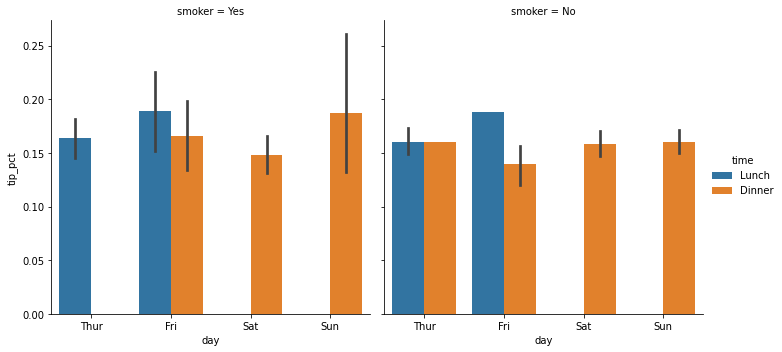

In [ ]:
# factorplot의 이름이 catplot으로 업데이트 된다고 한다

sns.catplot(x='day',y='tip_pct', hue='time',col='smoker', kind='bar',data= tip_data);

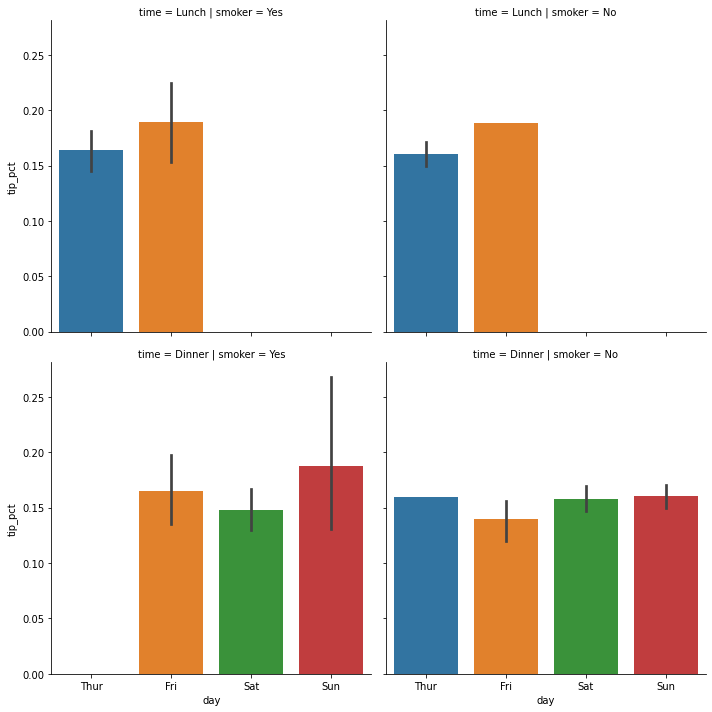

In [ ]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker',kind='bar',data=tip_data)

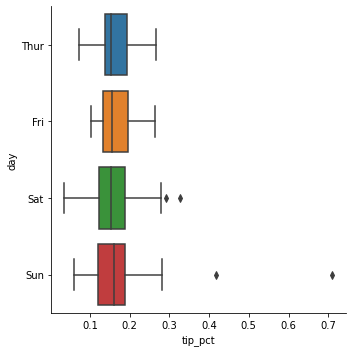

In [ ]:
sns.catplot(x='tip_pct',y='day',kind='box', data=tip_data);

# 10장: 데이터 집계와 Group

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Groupby 개념 이모저모

In [2]:
df = pd.DataFrame({'data1': np.random.randn(5), 'data2': np.random.randn(5), 
                   'key1':['a','a','b','b','a'], 'key2':['one','two','one','two','one']})

df

,data1,data2,key1,key2
0,1.319524,-0.357919,a,one
1,-1.809937,0.881453,a,two
2,0.261426,0.467215,b,one
3,-1.513089,0.359826,b,two
4,-0.258033,-0.217356,a,one


In [3]:
# 개념1: 다른 array, 시리즈, 딕셔너리를 만들어서, 그걸 기준으로 groupby를 해줄 수 있다. 

## 1-1) array로 groupby

states = np.array(['Ohio','Cali','Cali','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])

df['data1'].groupby([states, years]).mean()

Cali  2005   -1.809937
      2006    0.261426
Ohio  2005   -0.096782
      2006   -0.258033
Name: data1, dtype: float64

In [4]:
# 1-2) 딕셔너리로 groupby

people = pd.DataFrame(np.random.randn(5,5), columns=['a','b','c','d','e'],
                      index=['Joe','Steve','Wes','Jim','Travis'])

mapping = {'a':'red','b':'red', 'c':'blue',
           'd':'blue','e':'red'}

people.groupby(mapping, axis=1).sum()

,blue,red
Joe,-0.188318,1.078741
Steve,1.985513,0.718535
Wes,-0.080630,-1.968335
Jim,0.372809,1.733676
Travis,-0.017040,-0.928133


In [5]:
# 1-3) 시리즈로 groupby

ser = pd.Series(mapping)

people.groupby(ser, axis=1).sum()

,blue,red
Joe,-0.188318,1.078741
Steve,1.985513,0.718535
Wes,-0.080630,-1.968335
Jim,0.372809,1.733676
Travis,-0.017040,-0.928133


In [6]:
# 개념2: groupby를 해줄때, Numeric data가 아닌 값들은 자동으로 생략된다. (Nuisance column 이라 부른다)
## 아래 예제에선 'key2'열이 생략되었다.

df['data1'].groupby(df['key1']).mean()

key1
a   -0.249482
b   -0.625831
Name: data1, dtype: float64

In [7]:
# 개념3: groupby는 size 매서드를 주로 사용한다.

df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [8]:
# 개념4: groupby로 반복문 돌리기

for name, group in df.groupby(['key1']):
  print(name)
  print(group)

## 집계함수를 사용하지 않고, 각각의 그룹을 만들고 싶을땐 이 방식을 사용하면 된다.

a
      data1     data2 key1 key2
0  1.319524 -0.357919    a  one
1 -1.809937  0.881453    a  two
4 -0.258033 -0.217356    a  one
b
      data1     data2 key1 key2
2  0.261426  0.467215    b  one
3 -1.513089  0.359826    b  two


In [9]:
# 개념4 con: 멀티플 키 반복문  -> 튜플로 받아준다

for (key1, key2), group in df.groupby(['key1','key2']):
  print(key1,key2)
  print(group)

# name 대신, 튜플이 들어간 것을 보자

a one
      data1     data2 key1 key2
0  1.319524 -0.357919    a  one
4 -0.258033 -0.217356    a  one
a two
      data1     data2 key1 key2
1 -1.809937  0.881453    a  two
b one
      data1     data2 key1 key2
2  0.261426  0.467215    b  one
b two
      data1     data2 key1 key2
3 -1.513089  0.359826    b  two


In [10]:
# 개념 5: axis=1로 groupby 해보자

for name, group in df.groupby(df.dtypes, axis=1):
  print(name)
  print(group)

## data1과 data2는 float64, key1과 key2는 object기 때문에 groupby 되었다.

float64
      data1     data2
0  1.319524 -0.357919
1 -1.809937  0.881453
2  0.261426  0.467215
3 -1.513089  0.359826
4 -0.258033 -0.217356
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [11]:
# 개념6: groupby하고, 일부의 column만 출력하기  [데이터프레임이냐, 시리즈냐를 선택할 수 있음!]

## 데이터후레임으로  -> double square brakcet

df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.287638
     two   0.881453
b    one   0.467215
     two   0.359826

In [12]:
## 시리즈로 -> single square bracket

df.groupby(['key1','key2'])['data2'].mean()

key1  key2
a     one    -0.287638
      two     0.881453
b     one     0.467215
      two     0.359826
Name: data2, dtype: float64

## Groupby: agg 사용

In [13]:
# 우선 다시 데이터를 불러오자
df

,data1,data2,key1,key2
0,1.319524,-0.357919,a,one
1,-1.809937,0.881453,a,two
2,0.261426,0.467215,b,one
3,-1.513089,0.359826,b,two
4,-0.258033,-0.217356,a,one


In [14]:
# groupby에 사용할 함수를 정의해보자
def peak_to_peak(arr):
  return arr.max() - arr.min()

## 내가 만든 함수를 groupby 집계로 사용할 경우, agg를 사용해 줘야 한다
df.groupby('key1')[['data1','data2']].agg(peak_to_peak)

,data1,data2
key1,,
a,3.129461,1.239372
b,1.774515,0.107390


In [15]:
tips_df = sns.load_dataset('tips')

tips_df.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [16]:
# agg에 여러 집계함수 넣어보기 -> 리스트 형태로 넣으면 된다

tips_df.groupby(['day','smoker']).agg(['mean','std',peak_to_peak])

total_bill                               tip            \
                  mean        std peak_to_peak      mean       std   
day  smoker                                                          
Thur Yes     19.190588   8.355149        32.77  3.030000  1.113491   
     No      17.113111   7.721728        33.68  2.673778  1.282964   
Fri  Yes     16.813333   9.086388        34.42  2.714000  1.077668   
     No      18.420000   5.059282        10.29  2.812500  0.898494   
Sat  Yes     21.276667  10.069138        47.74  2.875476  1.630580   
     No      19.661778   8.939181        41.08  3.102889  1.642088   
Sun  Yes     24.120000  10.442511        38.10  3.516842  1.261151   
     No      20.506667   8.130189        39.40  3.167895  1.224785   

                              size                         
            peak_to_peak      mean       std peak_to_peak  
day  smoker                                                
Thur Yes            3.00  2.352941  0.701888            2  
     No             5.45  2.488889  1.179796            5  
Fri  Yes            3.73  2.066667  0.593617            3  
     No             2.00  2.250000  0.500000            1  
Sat  Yes            9.00  2.476190  0.862161            4  
     No             8.00  2.555556  0.784960            3  
Sun  Yes            5.00  2.578947  0.901591            3  
     No             4.99  2.929825  1.032674            4

In [17]:
# agg 고급사용: 특정열에 각각 다른 집계 함수 적용하기 -> 딕셔너리를 사용하면 된다

tips_df.groupby(['day','smoker']).agg({'tip': [np.max, np.min], 'total_bill': 'mean','size':'sum'})

## tip열에는 max,min /  total_bill 열에는 mean 이런식으로 적용됨

tip       total_bill size
              amax  amin       mean  sum
day  smoker                             
Thur Yes      5.00  2.00  19.190588   40
     No       6.70  1.25  17.113111  112
Fri  Yes      4.73  1.00  16.813333   31
     No       3.50  1.50  18.420000    9
Sat  Yes     10.00  1.00  21.276667  104
     No       9.00  1.00  19.661778  115
Sun  Yes      6.50  1.50  24.120000   49
     No       6.00  1.01  20.506667  167

In [18]:
tips_df.pivot_table(index=['day', 'smoker'])

size       tip  total_bill
day  smoker                                
Thur Yes     2.352941  3.030000   19.190588
     No      2.488889  2.673778   17.113111
Fri  Yes     2.066667  2.714000   16.813333
     No      2.250000  2.812500   18.420000
Sat  Yes     2.476190  2.875476   21.276667
     No      2.555556  3.102889   19.661778
Sun  Yes     2.578947  3.516842   24.120000
     No      2.929825  3.167895   20.506667

## Groupby: apply 사용

* apply와 agg의 차이를 집중해서 공부해보자
-  agg는 집계함수, apply는 특정조건에 맞는 것을 추출하는데 사용하는 듯...

In [19]:
tips_df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [31]:
# apply에 사용할 함수를 만들어보자

def top(df, n=5, column= 'tip'):
  return df.sort_values(by=column)[-n:]

top(tips_df, n=3)

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3


In [28]:
# apply에 top을 적용시켜보자 -> agg함수와의 차이를 느껴보자
tips_df.groupby('smoker').apply(top)

total_bill    tip     sex smoker   day    time  size
smoker                                                          
Yes    211       25.89   5.16    Male    Yes   Sat  Dinner     4
       181       23.33   5.65    Male    Yes   Sun  Dinner     2
       214       28.17   6.50  Female    Yes   Sat  Dinner     3
       183       23.17   6.50    Male    Yes   Sun  Dinner     4
       170       50.81  10.00    Male    Yes   Sat  Dinner     3
No     47        32.40   6.00    Male     No   Sun  Dinner     4
       141       34.30   6.70    Male     No  Thur   Lunch     6
       59        48.27   6.73    Male     No   Sat  Dinner     4
       23        39.42   7.58    Male     No   Sat  Dinner     4
       212       48.33   9.00    Male     No   Sat  Dinner     4

In [29]:
# 정의해둔 top함수의 default값을 바꾸고 싶으면 뒤에 인수를 주면 된다.

tips_df.groupby('smoker').apply(top, n=2, column='total_bill')

total_bill    tip   sex smoker  day    time  size
smoker                                                       
Yes    182       45.35   3.50  Male    Yes  Sun  Dinner     3
       170       50.81  10.00  Male    Yes  Sat  Dinner     3
No     59        48.27   6.73  Male     No  Sat  Dinner     4
       212       48.33   9.00  Male     No  Sat  Dinner     4

In [33]:
# group_keys = False를 주면, 그룹바이를 하되, 인덱스를 만들진 않는다

tips_df.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size
211,25.89,5.16,Male,Yes,Sat,Dinner,4
181,23.33,5.65,Male,Yes,Sun,Dinner,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


## cut함수를 응용한 Groupby

In [39]:
frame = pd.DataFrame({'data1': np.random.randn(1000), 
                      'data2': np.random.randn(1000)})

# 우선 자르자
cutted = pd.cut(frame['data1'], 4)

cutted[:3]

0     (0.342, 2.058]
1    (-1.375, 0.342]
2     (0.342, 2.058]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.098, -1.375] < (-1.375, 0.342] < (0.342, 2.058] <
                                           (2.058, 3.774]]

In [44]:
# cut으로 잘라준 것을 바로 그룹바이 기준으로 넣어줄 수 있다.

frame['data2'].groupby(cutted).agg(np.max)

data1
(-3.098, -1.375]    2.801494
(-1.375, 0.342]     2.692247
(0.342, 2.058]      3.312565
(2.058, 3.774]      2.109915
Name: data2, dtype: float64

In [45]:
p

0      8
1      5
2      9
3      4
4      1
      ..
995    9
996    2
997    1
998    1
999    9
Name: data1, Length: 1000, dtype: int64